In [59]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [1]:
import pandas as pd

In [4]:
import numpy as np

## Information about hosts (servers) used

### choinka (WMiI UMK)

- hardware
  - GPU
    - NVIDIA GeForce RTX 2080 Ti
    - memory: 11019 MiB (11 GiB GDDR6)
    - compute capability: 7.5
    - GPU Architecture: Turing
    - https://www.nvidia.com/en-me/geforce/graphics-cards/rtx-2080-ti/
    - https://www.techpowerup.com/gpu-specs/geforce-rtx-2080-ti.c3305
  - CPU
    - Intel(R) Core(TM) i9-7920X CPU @ 2.90GHz
    - memory: 62 GiB RAM / 64+2 GB
    - cores: 24
    - threads per core: 2

- software
  - NVIDIA driver 470.94
  - CUDA 11.4

## Examine meta parser - parts (no cuDF conversion)

In [48]:
df = pd.read_csv('benchmark.csv', index_col=1)

In [49]:
df

,json file,max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],Parsing total [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Total time measured by GPU [ns],Total time measured by CPU [ns]
number of objects,,,,,,,,,,,,,,
100000,sample_100000.json,NaN,STATIC,none,32,4095,5639679,549376,10467230,10347999,119231,345867218,362527618,368156804
200000,sample_200000.json,NaN,STATIC,none,32,2144,10546688,918016,19945471,19828735,116736,694044799,725457092,736890428
300000,sample_300000.json,NaN,STATIC,none,32,3391,15717120,1265535,29089631,28993663,95968,1055995117,1102070800,1118333973
400000,sample_400000.json,NaN,STATIC,none,32,4095,21258047,1765568,38499837,38410270,89567,1401558227,1463085693,1485693012
500000,sample_500000.json,NaN,STATIC,none,32,2976,26564416,2033855,48328702,48228351,100351,1747113647,1824043579,1851647336
600000,sample_600000.json,NaN,STATIC,none,32,3295,31642335,2472032,57495677,57387134,108543,2094846923,2186460205,2219683262
700000,sample_700000.json,NaN,STATIC,none,32,3231,36975486,2869247,67300611,67215011,85600,2445350585,2552499023,2597928379
800000,sample_800000.json,NaN,STATIC,none,32,2047,40077121,3197119,76795580,76699165,96415,2803187500,2923259277,2966808889
900000,sample_900000.json,NaN,STATIC,none,32,3391,47147487,3551455,85760002,85664802,95200,3144182861,3280645263,3330369783


In [50]:
df.describe()

,max string size,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],Parsing total [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Total time measured by GPU [ns],Total time measured by CPU [ns]
count,0.0,9.0,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000e+00,9.000000e+00,9.000000e+00
mean,NaN,32.0,3185.000000,2.617426e+07,2.069134e+06,4.818697e+07,4.808613e+07,100845.666667,1.748016e+09,1.824450e+09,1.852835e+09
std,NaN,0.0,722.642201,1.405033e+07,1.039594e+06,2.588701e+07,2.589425e+07,11645.554280,9.581910e+08,9.991504e+08,1.014746e+09
min,NaN,32.0,2047.000000,5.639679e+06,5.493760e+05,1.046723e+07,1.034800e+07,85600.000000,3.458672e+08,3.625276e+08,3.681568e+08
25%,NaN,32.0,2976.000000,1.571712e+07,1.265535e+06,2.908963e+07,2.899366e+07,95200.000000,1.055995e+09,1.102071e+09,1.118334e+09
50%,NaN,32.0,3295.000000,2.656442e+07,2.033855e+06,4.832870e+07,4.822835e+07,96415.000000,1.747114e+09,1.824044e+09,1.851647e+09
75%,NaN,32.0,3391.000000,3.697549e+07,2.869247e+06,6.730061e+07,6.721501e+07,108543.000000,2.445351e+09,2.552499e+09,2.597928e+09
max,NaN,32.0,4095.000000,4.714749e+07,3.551455e+06,8.576000e+07,8.566480e+07,119231.000000,3.144183e+09,3.280645e+09,3.330370e+09


In [51]:
df.columns

Index(['json file', 'max string size', 'string handling', 'assumptions',
       'workgroup size', 'Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'Parsing total [ns]', 'JSON processing [ns]', 'Post kernel hooks [ns]',
       'Copying output [ns]', 'Total time measured by GPU [ns]',
       'Total time measured by CPU [ns]'],
      dtype='object')

In [52]:
alldf = df[['Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'JSON processing [ns]', 'Post kernel hooks [ns]','Copying output [ns]']]

In [53]:
subdf = df[['Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'JSON processing [ns]', 'Post kernel hooks [ns]']]

In [54]:
subdf

,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],JSON processing [ns],Post kernel hooks [ns]
number of objects,,,,,
100000,4095,5639679,549376,10347999,119231
200000,2144,10546688,918016,19828735,116736
300000,3391,15717120,1265535,28993663,95968
400000,4095,21258047,1765568,38410270,89567
500000,2976,26564416,2033855,48228351,100351
600000,3295,31642335,2472032,57387134,108543
700000,3231,36975486,2869247,67215011,85600
800000,2047,40077121,3197119,76699165,96415
900000,3391,47147487,3551455,85664802,95200


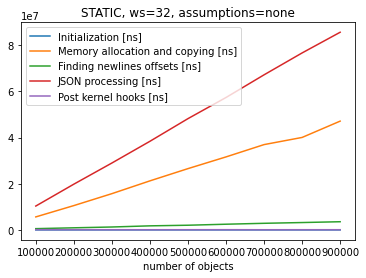

In [55]:
ax = subdf.plot(title='STATIC, ws=32, assumptions=none')

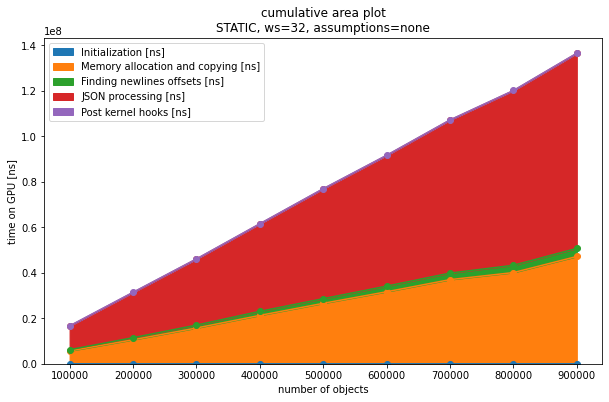

In [56]:
ax = subdf.plot(
    kind='area', grid=False, style='o-', #style=['.-','o-','x-','s-','+-'],
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

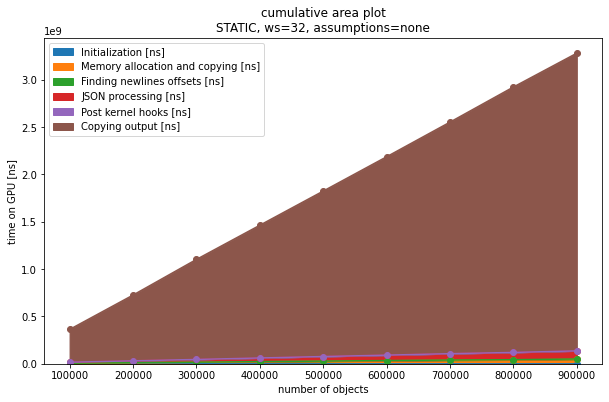

In [57]:
ax = alldf.plot(
    kind='area', grid=False, style='o-',
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

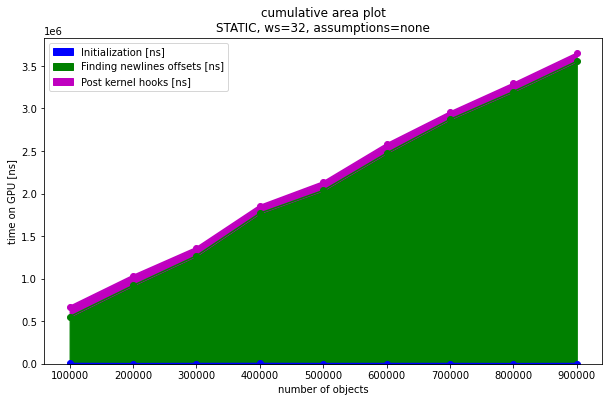

In [58]:
smalldf = df[['Initialization [ns]',
       'Finding newlines offsets [ns]',
       'Post kernel hooks [ns]']]
ax = smalldf.plot(
    kind='area', grid=False, style='o-', color=['b','g','m'],
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

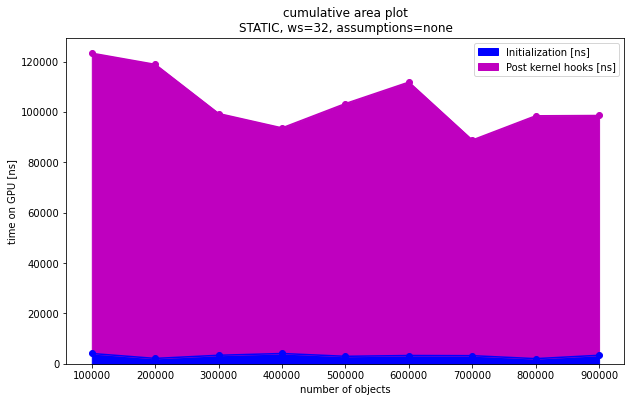

In [59]:
smallerdf = df[['Initialization [ns]',
       'Post kernel hooks [ns]']]
ax = smallerdf.plot(
    kind='area', grid=False, style='o-', color=['b','m'],
    title='cumulative area plot\nSTATIC, ws=32, assumptions=none',
    ylabel='time on GPU [ns]',
    figsize=(10,6)
)

## Run `meta-json-parser-benchmark --use-libcudf-parser ...`

All those examples use synthetic JSONL files generated using [`generate.py`][1] from [mis-wut/json2meta][2] repository, with different number of samples / objects / lines.

Generated JSON file looks like this:
```.json
{"date":"2010-01-01 00:00:00","lat":3250,"lon":6719,"is_checked":true,"name":"name169","1_date":"2010-01-01 00:00:00","1_lat":6101,"1_lon":7849,"1_is_checked":true,"1_name":"name648","2_date":"2010-01-01 00:00:00","2_lat":141,"2_lon":7615,"2_is_checked":true,"2_name":"name40","3_date":"2010-01-01 00:00:00","3_lat":5288,"3_lon":6879,"3_is_checked":false,"3_name":"name760"}
{"date":"2011-03-23 10:40:00","lat":22,"lon":8187,"is_checked":false,"name":"name994","1_date":"2011-03-23 10:40:00","1_lat":1106,"1_lon":3562,"1_is_checked":true,"1_name":"name355","2_date":"2011-03-23 10:40:00","2_lat":293,"2_lon":4242,"2_is_checked":true,"2_name":"name735","3_date":"2011-03-23 10:40:00","3_lat":533,"3_lon":4007,"3_is_checked":true,"3_name":"name766"}
```

[1]: https://github.com/mis-wut/json2meta/blob/master/poc/generate.py
[2]: https://github.com/mis-wut/json2meta

### System-wide cuDF (v0.12.0)

For start, use system-wide installation of _libcudf_ library present on 'choinka', installed as `/usr/local/lib/libcudf.so`

This is probably libcudf version 'v0.12.0-14583-gdeee1f62d1'

In [60]:
df_cudf = pd.read_csv('benchmark_libcudf_cudf=unknown_choinka.csv', index_col=2)

In [61]:
df_cudf

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns]
number of objects,,,,,,,
10,sample_10.json,3762,2848,11904,924485412,924500183,924599776
100000,sample_100000.json,37657774,14336,30719,1012709350,1012754455,1395741621
200000,sample_200000.json,75315528,13887,28799,1058279418,1058322143,1799592455
300000,sample_300000.json,112972487,14368,34816,1091771850,1091821044,2194938886
400000,sample_400000.json,150629477,13151,32767,1123995605,1124041625,2578447376
500000,sample_500000.json,188286524,12288,29888,1164108642,1164150756,2979471790
600000,sample_600000.json,225944103,12351,30559,1188685913,1188728759,3362605356
700000,sample_700000.json,263602285,4608,16383,1162776611,1162797607,1199848285
800000,sample_800000.json,301259755,12288,30079,1257976440,1258018798,4205601719


In [104]:
df_cudf_samples = pd.read_csv('benchmark_libcudf_cudf=unknown_samples=12_choinka.csv', index_col=2).sort_index()
df_cudf_samples['number of objects'] = df_cudf_samples.index
df_cudf_samples[df_cudf_samples['json file'] == 'sample_10.json'].describe()

,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],number of objects
count,12.0,12.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,12.0
mean,3762.0,3204.583333,12298.250000,9.226683e+08,9.226838e+08,9.227850e+08,10.0
std,0.0,1645.525418,3707.463826,5.777907e+06,5.779345e+06,5.784947e+06,0.0
min,3762.0,2047.000000,9600.000000,9.138660e+08,9.138787e+08,9.139800e+08,10.0
25%,3762.0,2463.000000,10855.000000,9.169497e+08,9.169637e+08,9.170587e+08,10.0
50%,3762.0,2607.000000,11456.000000,9.233412e+08,9.233556e+08,9.234502e+08,10.0
75%,3762.0,3143.750000,12023.250000,9.277825e+08,9.278013e+08,9.279181e+08,10.0
max,3762.0,8191.000000,23776.000000,9.304500e+08,9.304622e+08,9.305513e+08,10.0


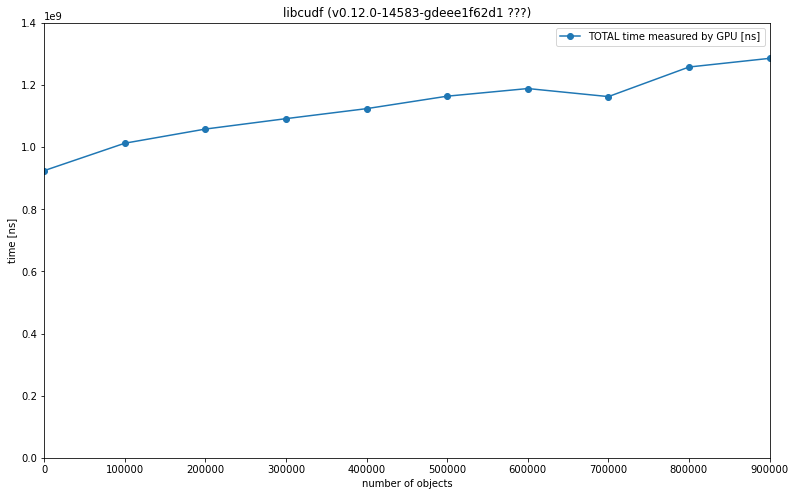

In [62]:
ax = df_cudf[['TOTAL time measured by GPU [ns]']]\
       .plot(title='libcudf (v0.12.0-14583-gdeee1f62d1 ???)',
            figsize=(13,8), style='o-',
            xlim=(0,900000),
            ylim=(0,1400000000), ylabel='time [ns]')

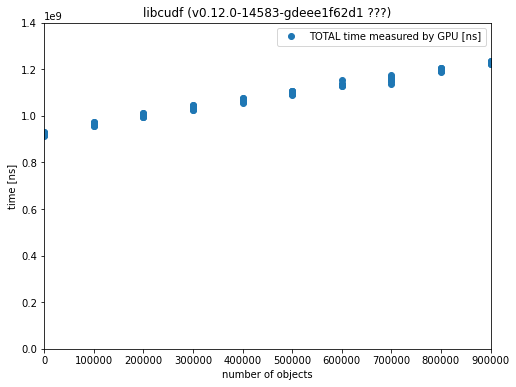

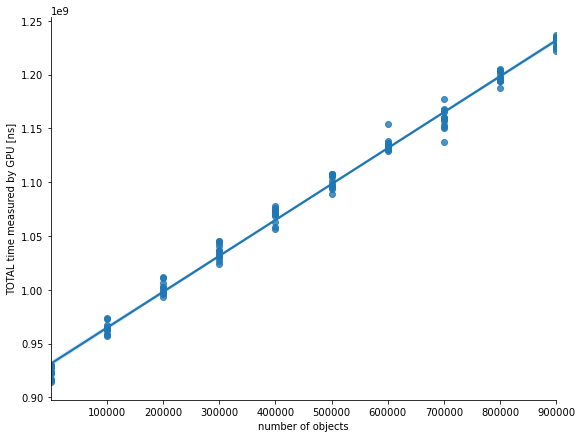

In [104]:
ax = df_cudf_samples[['TOTAL time measured by GPU [ns]']].plot(
    title='libcudf (v0.12.0-14583-gdeee1f62d1 ???)',
    figsize=(8,6), style='o',
    xlim=(0,900000),
    ylim=(0,1400000000), ylabel='time [ns]'
)
ax = sns.lmplot(
    data=df_cudf_samples,
    x='number of objects',
    y='TOTAL time measured by GPU [ns]',
    robust=True,
    height=6, aspect=8/6,
) 

In [114]:
s=df_cudf_samples.groupby(level=0)['TOTAL time measured by GPU [ns]'].median()
s

number of objects
10        9.233556e+08
100000    9.638461e+08
200000    1.000231e+09
300000    1.034761e+09
400000    1.070184e+09
500000    1.099718e+09
600000    1.132997e+09
700000    1.159320e+09
800000    1.196674e+09
900000    1.231435e+09
Name: TOTAL time measured by GPU [ns], dtype: float64

In [115]:
s[10]

923355560.0

In [63]:
df_cudf.at[10, 'TOTAL time measured by GPU [ns]']

924500183

In [64]:
df_cudf_mv = df_cudf[['TOTAL time measured by GPU [ns]']] - df_cudf.at[10, 'TOTAL time measured by GPU [ns]']
df_cudf_mv

,TOTAL time measured by GPU [ns]
number of objects,
10,0
100000,88254272
200000,133821960
300000,167320861
400000,199541442
500000,239650573
600000,264228576
700000,238297424
800000,333518615


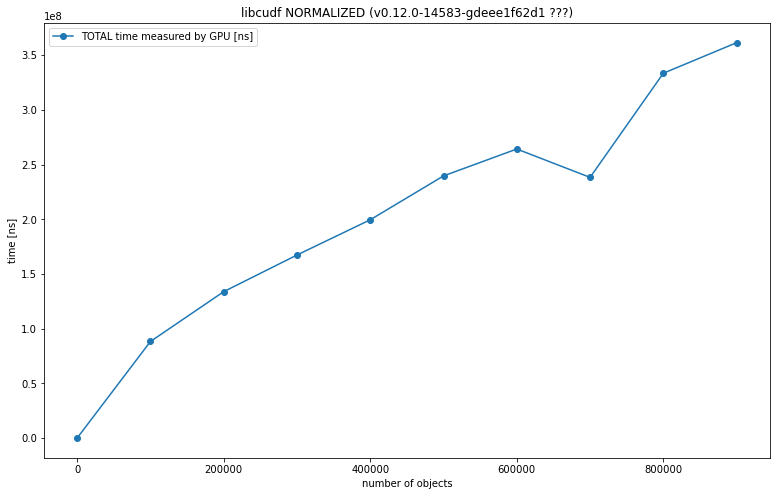

In [65]:
ax = df_cudf_mv.plot(title='libcudf NORMALIZED (v0.12.0-14583-gdeee1f62d1 ???)',
                      figsize=(13,8), style='o-',
                      ylabel='time [ns]')

In [66]:
df_cmp = pd.DataFrame()
df_cmp['meta-json-parser (STATIC, ws=32, assumptions=none, !convert)'] = \
   df['Total time measured by GPU [ns]'] - df['Copying output [ns]']
df_cmp['use-libcudf-parser (NORMALIZED, v0.12.0-14583-gdeee1f62d1 ???))'] = \
   df_cudf_mv

In [120]:
df_cmp = pd.DataFrame()
df_cmp['meta-json-parser (STATIC, ws=32, assumptions=none, !convert)'] = \
   df['Total time measured by GPU [ns]'] - df['Copying output [ns]']
df_cmp['use-libcudf-parser (NORMALIZED, v0.12.0-14583-gdeee1f62d1 ???, median of 12)'] = \
   s - s[10]

In [121]:
df_cmp

,"meta-json-parser (STATIC, ws=32, assumptions=none, !convert)","use-libcudf-parser (NORMALIZED, v0.12.0-14583-gdeee1f62d1 ???, median of 12))"
number of objects,,
100000,16660400,40490569.5
200000,31412293,76875152.5
300000,46075683,111405914.0
400000,61527466,146828216.5
500000,76929932,176362457.0
600000,91613282,209641571.0
700000,107148438,235964569.0
800000,120071777,273318756.0
900000,136462402,308079071.0


In [122]:
df_ratio=df_cmp.iloc[:,1]/df_cmp.iloc[:,0]
df_ratio

number of objects
100000    2.430348
200000    2.447295
300000    2.417890
400000    2.386385
500000    2.292508
600000    2.288332
700000    2.202221
800000    2.276295
900000    2.257611
dtype: float64

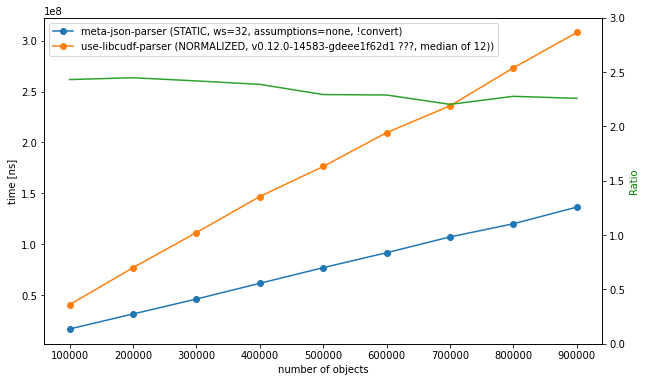

In [133]:
ax = df_cmp.plot(
    figsize=(10,6), style='o-',
    ylabel='time [ns]',
    #grid=True,
)
df_ratio.plot(ax=ax, secondary_y=True)
ax.right_ax.set_ylabel('Ratio', color='g')
ax.right_ax.set_ylim(bottom=0.0, top=3.0)

### RAPIDS Docker image: CUDA 11.4, cuDF 21.10

RAPIDS Docker image: `rapidsai/rapidsai-core-dev:21.10-cuda11.4-devel-ubuntu20.04-py3.8`  
cgroups turned off

See https://hub.docker.com/r/rapidsai/rapidsai-dev/tags

```.sh
sudo docker run --gpus all --rm -it \
 --device /dev/nvidia0 --device /dev/nvidia-modeset \
 --device /dev/nvidia-uvm --device /dev/nvidia-uvm-tools \
 --device /dev/nvidiactl \
 -p 8888:8888 -p 8787:8787 -p 8786:8786 \
 -v ${HOME}/GPU-IDUB/meta-json-parser:/meta-json-parser \
 -v ${HOME}/GPU-IDUB/data:/data \
 rapidsai/rapidsai-core-dev:21.10-cuda11.4-devel-ubuntu20.04-py3.8
```

In [101]:
# read results for ./meta-json-parser-benchmark with --use-libcudf-parser
df_cudf = pd.read_csv('benchmark_libcudf_cudf=21.10-docker_multisample_choinka.csv', index_col=2).sort_index()
df_cudf['number of objects'] = df_cudf.index

In [7]:
df_cudf

,json file,file size [bytes],Initialization [ns],Building input options [ns],Parsing json with libcudf [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],number of objects
number of objects,,,,,,,,
10,sample_10.json,3762,2272,14303,3831840,3848416,3942117,10
10,sample_10.json,3762,2240,14080,3907840,3924160,4021684,10
10,sample_10.json,3762,2047,14175,3805183,3821408,3910966,10
10,sample_10.json,3762,3199,14655,3729023,3746880,3868862,10
10,sample_10.json,3762,2495,14112,3743904,3760512,3852246,10
...,...,...,...,...,...,...,...,...
900000,sample_900000.json,338913914,6144,21536,386085052,386112731,434346708,900000
900000,sample_900000.json,338913914,6240,20160,388579315,388605712,437848760,900000
900000,sample_900000.json,338913914,6335,22239,389391754,389420318,438399325,900000


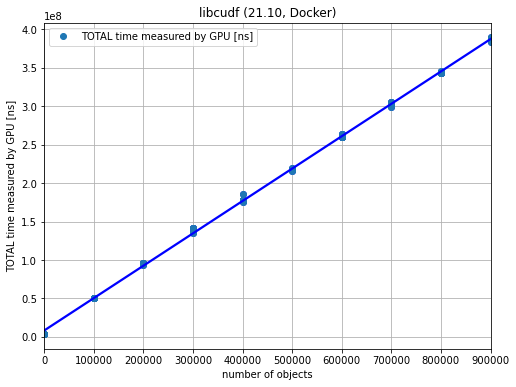

In [12]:
ax = df_cudf[['TOTAL time measured by GPU [ns]']].plot(
    title='libcudf (21.10, Docker)',
    figsize=(8,6), style='o',
    xlim=(0,900000),
    # ylim=(0,1400000000), 
    ylabel='time [ns]',
    grid=True,
)
ax = sns.regplot(
    ax=ax,
    data=df_cudf,
    x='number of objects',
    y='TOTAL time measured by GPU [ns]',
    #robust=True,
    color='b',
) 

In [102]:
# read results for ./meta-json-parser-benchmark 
df_meta = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_multisample_choinka.csv', index_col=2).sort_index()
df_meta['number of objects'] = df_meta.index
df_meta['NOD2H time measured by GPU [ns]'] = df_meta['TOTAL time measured by GPU [ns]'] - df_meta['Copying output [ns]']

In [18]:
df_meta.columns

Index(['json file', 'file size [bytes]', 'max string size', 'string handling',
       'assumptions', 'workgroup size', 'Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'TOTAL Parsing time (JSON+hooks) [ns]', 'JSON processing [ns]',
       'Post kernel hooks [ns]', 'Copying output [ns]',
       'Converting to cuDF format [ns]', 'TOTAL time measured by GPU [ns]',
       'TOTAL time measured by CPU [ns]', 'number of objects',
       'NOD2H time measured by GPU [ns]'],
      dtype='object')

In [19]:
df_meta

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],number of objects,NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,,
10,sample_10.json,3762,NaN,STATIC,none,32,5599,341791,152032,870624,751232,119392,165631,1248160,2783839,2870168,10,2618208
10,sample_10.json,3762,NaN,STATIC,none,32,4031,424416,171200,858943,745280,113664,167263,1331007,2956864,3052399,10,2789601
10,sample_10.json,3762,NaN,STATIC,none,32,4160,426432,168224,854016,743423,110592,170016,1235136,2857984,2946866,10,2687968
10,sample_10.json,3762,NaN,STATIC,none,32,4480,425695,194848,906592,785632,120959,174559,1306848,3013024,3117893,10,2838465
10,sample_10.json,3762,NaN,STATIC,none,32,4095,445791,174751,860159,751616,108543,171552,1280287,2936640,3032761,10,2765088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800000,sample_800000.json,301259755,NaN,STATIC,none,32,6783,44037952,3212608,71268707,71162750,105952,2627487792,9944000,2755957763,2798275799,800000,128469971
900000,sample_900000.json,338913914,NaN,STATIC,none,32,8191,49387424,3575999,78596092,78479133,116959,2941532226,10542528,3083642333,3131416311,900000,142110107
900000,sample_900000.json,338913914,NaN,STATIC,none,32,6304,49463294,3559423,78274208,78171714,102495,2940141113,10565600,3082010009,3129716678,900000,141868896


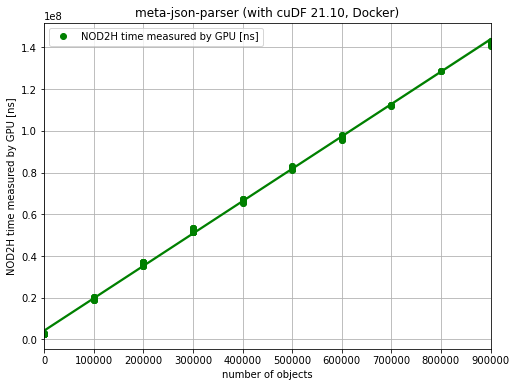

In [22]:
ax = df_meta[['NOD2H time measured by GPU [ns]']].plot(
    title='meta-json-parser (with cuDF 21.10, Docker)',
    figsize=(8,6), style='o',color='g',
    xlim=(0,900000),
    # ylim=(0,1400000000), 
    ylabel='time [ns]',
    grid=True,
)
ax = sns.regplot(
    ax=ax,
    data=df_meta,
    x='number of objects',
    y='NOD2H time measured by GPU [ns]',
    #robust=True,
    color='g',
)

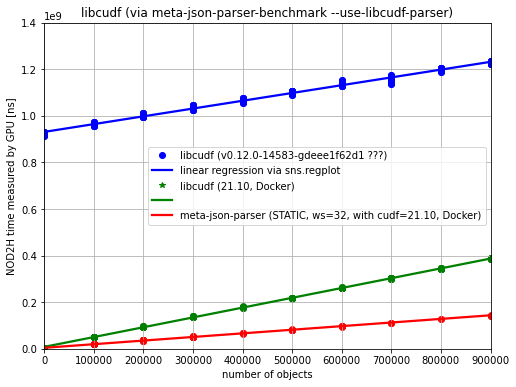

In [109]:
fig, ax = plt.subplots()
ax1 = df_cudf_samples[['TOTAL time measured by GPU [ns]']].plot(
    ax=ax,
    title='libcudf (via meta-json-parser-benchmark --use-libcudf-parser)',
    #label='libcudf (v0.12.0-14583-gdeee1f62d1 ???)',
    figsize=(8,6), style='o',
    color='b',
    xlim=(0,900000),
    ylim=(0,1400000000),
    ylabel='time [ns]',
    grid=True,
)
ax2 = sns.regplot(
    ax=ax,
    data=df_cudf_samples,
    x='number of objects',
    y='TOTAL time measured by GPU [ns]',
    color='b'
    #robust=True,
    #height=6, aspect=8/6,
) 
ax3 = df_cudf[['TOTAL time measured by GPU [ns]']].plot(
    ax=ax,
    #label='libcudf (21.10, Docker)',
    #figsize=(8,6), 
    style='*', color='g',
    # xlim=(0,900000),
    # ylim=(0,1400000000), 
    # ylabel='time [ns]',
    grid=True,
)
ax4 = sns.regplot(
    ax=ax,
    data=df_cudf,
    x='number of objects',
    y='TOTAL time measured by GPU [ns]',
    #robust=True,
    color='g',
)
sns.regplot(
    ax=ax,
    data=df_meta,
    x='number of objects',
    y='NOD2H time measured by GPU [ns]',
    #robust=True,
    color='r',
)
ax.legend(['libcudf (v0.12.0-14583-gdeee1f62d1 ???)','linear regression via sns.regplot','libcudf (21.10, Docker)',
           '','meta-json-parser (STATIC, ws=32, with cudf=21.10, Docker)'])
plt.savefig('fig.png', transparent=False)
plt.show()

In [23]:
df_cmp = pd.DataFrame()
df_cmp['meta-json-parser (STATIC, ws=32, assumptions=none, cudf=21.10) median'] = \
   df_meta.groupby(level=0)['NOD2H time measured by GPU [ns]'].median()
df_cmp['benchmark --use-libcudf-parser (Docker, cudf=21.10) median'] = \
   df_cudf.groupby(level=0)['TOTAL time measured by GPU [ns]'].median()

In [24]:
df_cmp

,"meta-json-parser (STATIC, ws=32, assumptions=none, cudf=21.10) median","benchmark --use-libcudf-parser (Docker, cudf=21.10) median"
number of objects,,
10,2769089.0,3799232
100000,19597625.0,50587646
200000,36163116.5,95226974
300000,52238922.0,137216583
400000,67070434.5,177795837
500000,81860718.0,217732543
600000,97068908.5,261726196
700000,112215576.0,302828369
800000,128584839.0,343988342


In [25]:
s_ratio=df_cmp.iloc[:,1]/df_cmp.iloc[:,0]
s_ratio

number of objects
10        1.372015
100000    2.581315
200000    2.633262
300000    2.626712
400000    2.650882
500000    2.659793
600000    2.696293
700000    2.698630
800000    2.675186
900000    2.724623
dtype: float64

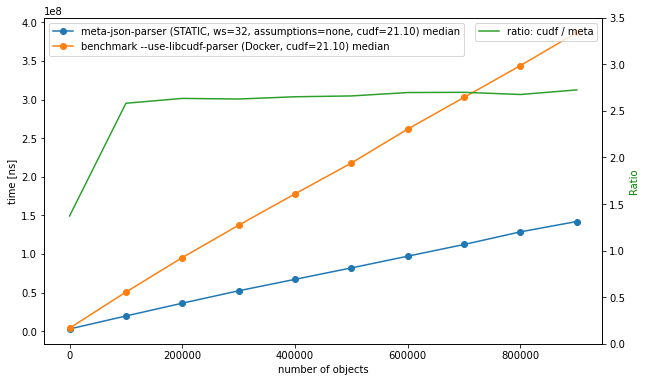

In [35]:
ax = df_cmp.plot(
    figsize=(10,6), style='o-',
    ylabel='time [ns]',
    #grid=True,
)
s_ratio.plot(ax=ax, secondary_y=True, label='ratio: cudf / meta')
ax.right_ax.set_ylabel('Ratio', color='g')
ax.right_ax.set_ylim(bottom=0.0, top=3.5)
ax.right_ax.legend(loc=0)
#plt.savefig('fig.png')

## Grid search - analysis of meta-parser behavior

This section contains analysis of changes in `meta-json-parser-benchmark` performance for different sets of parameters configuring the parser.  The `benchmark_metaparser_cudf=21.10-docker_size=900000_grid_choinka.csv` file that will be used for this analysis was generated using the `run_benchmarks_grid.sh` script a few times (to protect against random timing differences).

All results are for the default largest size (900000) of JSON generated using `poc/generate.py` script from [json2meta](https://github.com/mis-wut/json2meta).

In [80]:
# read results for ./meta-json-parser-benchmark 
df_grid = pd.read_csv('benchmark_metaparser_cudf=21.10-docker_size=900000_grid_choinka.csv', index_col=2).sort_index()
# this is unnecessary for grid search results, as size is the same for each entry
#df_grid['number of objects'] = df_grid.index
# for STATIC string handling the maximum string size is hardcoded to 32 characters, and there is no --max-string-size runtime option
df_grid['max string size'] = df_grid['max string size'].fillna(32)
df_grid['NOD2H time measured by GPU [ns]'] = df_grid['TOTAL time measured by GPU [ns]'] - df_grid['Copying output [ns]']

df_grid

,json file,file size [bytes],max string size,string handling,assumptions,workgroup size,Initialization [ns],Memory allocation and copying [ns],Finding newlines offsets [ns],TOTAL Parsing time (JSON+hooks) [ns],JSON processing [ns],Post kernel hooks [ns],Copying output [ns],Converting to cuDF format [ns],TOTAL time measured by GPU [ns],TOTAL time measured by CPU [ns],NOD2H time measured by GPU [ns]
number of objects,,,,,,,,,,,,,,,,,
900000,sample_900000.json,338913914,32.0,STATIC,none,32,6304,49057567,3530976,78557182,78440444,116736,2937128662,10297183,3078577880,3126835062,141449218
900000,sample_900000.json,338913914,32.0,DYNAMIC V1,none,32,21312,49442817,3532799,1014925354,86335487,928589904,3266677490,310624,4334910644,4382809679,1068233154
900000,sample_900000.json,338913914,32.0,DYNAMIC V2,none,32,24544,50156383,140039398,88484642,82230049,6254591,3274138183,269918395,3822761474,3870684219,548623291
900000,sample_900000.json,338913914,32.0,DYNAMIC V3,none,32,20735,50958782,3563424,91324508,86498817,4825695,3282231689,304287,3428403320,3476167371,146171631
900000,sample_900000.json,338913914,32.0,STATIC,none,16,8063,49893985,3573760,206344192,206243453,100735,2945968994,10409760,3216198730,3265365977,270229736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900000,sample_900000.json,338913914,32.0,STATIC,constant order,16,7263,49396640,3546144,157855865,157776870,79007,2953618896,10203583,3174628417,3223056821,221009521
900000,sample_900000.json,338913914,32.0,STATIC,constant order,16,7168,49362720,3544480,166859588,166779708,79871,2953339111,10266079,3183379150,3231689556,230040039
900000,sample_900000.json,338913914,32.0,STATIC,constant order,16,7872,49488479,3574016,156843994,156741592,102399,2942251220,10354175,3162519775,3210266154,220268555


In [81]:
df_grid.columns

Index(['json file', 'file size [bytes]', 'max string size', 'string handling',
       'assumptions', 'workgroup size', 'Initialization [ns]',
       'Memory allocation and copying [ns]', 'Finding newlines offsets [ns]',
       'TOTAL Parsing time (JSON+hooks) [ns]', 'JSON processing [ns]',
       'Post kernel hooks [ns]', 'Copying output [ns]',
       'Converting to cuDF format [ns]', 'TOTAL time measured by GPU [ns]',
       'TOTAL time measured by CPU [ns]', 'NOD2H time measured by GPU [ns]'],
      dtype='object')

Let's check if all possible values of parameters are represented in the results, namely:
- string handling: \['STATIC', 'DYNAMIC V1', 'DYNAMIC V2', 'DYNAMIC V3'\]
- assumptions: \['none', 'constant order'\]
- workgroup size: \[32, 16, 8, 4\]

In [83]:
print('json file:       ', list(df_grid['json file'].unique()))
print('----------------')
print('max string size: ', list(df_grid['max string size'].unique()))
print('string handling: ', list(df_grid['string handling'].unique()))
print('assumptions:     ', list(df_grid['assumptions'].unique()))
print('workgroup size:  ', list(df_grid['workgroup size'].unique()))

json file:        ['sample_900000.json']
----------------
max string size:  [32.0]
string handling:  ['STATIC', 'DYNAMIC V1', 'DYNAMIC V2', 'DYNAMIC V3']
assumptions:      ['none', 'constant order']
workgroup size:   [32, 16, 8, 4]


Let's check if all possible combinations of values of parameters are present, namely

\['STATIC', 'DYNAMIC V1', 'DYNAMIC V2', 'DYNAMIC V3'\] \* \['none', 'constant order'\] \* \[32, 16, 8, 4\]

Which is 4\*2\*4 = 32

In [84]:
df_grid_grouped = df_grid.groupby(['string handling', 'max string size', 'assumptions', 'workgroup size'])
print('size of set of all parameters = 4*2*4 =', 4*2*4)
print(4*2*4)
len(set([f"{x}" for x in df_grid_grouped.groups.keys()]))

size of set of all parameters = 4*2*4 = 32
32


32

In [85]:
df_grid_grouped.count()['NOD2H time measured by GPU [ns]']

string handling  max string size  assumptions     workgroup size
DYNAMIC V1       32.0             constant order  4                 10
                                                  8                  7
                                                  16                13
                                                  32                13
                                  none            4                  7
                                                  8                  7
                                                  16                 9
                                                  32                10
DYNAMIC V2       32.0             constant order  4                 13
                                                  8                  7
                                                  16                13
                                                  32                13
                                  none            4                  7
            

In [100]:
df_grid_grouped\
  .median()[['NOD2H time measured by GPU [ns]']]\
  .style\
  .highlight_min(axis=0)\
  .highlight_max(axis=0, color='cyan')
#.highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;')

In [87]:
df_grid_ws = df_grid_grouped.median().groupby('workgroup size')
df_grid_ws_res = pd.DataFrame(data={
    'mean time': df_grid_ws.mean()['NOD2H time measured by GPU [ns]'],
    'min time': df_grid_ws.min()['NOD2H time measured by GPU [ns]'],
    'max time': df_grid_ws.max()['NOD2H time measured by GPU [ns]'],
    'stddev': df_grid_ws.std()['NOD2H time measured by GPU [ns]'],
})
df_grid_ws_res

,mean time,min time,max time,stddev
workgroup size,,,,
4,2.821826e+08,224339599.0,332987549.0,5.053267e+07
8,2.780265e+08,251457764.0,291770264.0,1.448864e+07
16,2.540135e+08,228168457.0,280820679.0,2.242046e+07
32,1.345490e+08,122717041.0,146220703.0,9.352241e+06


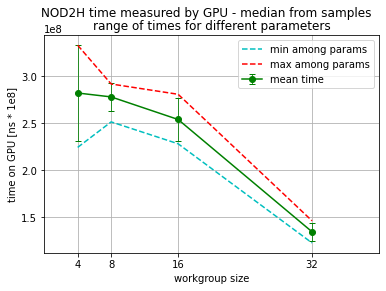

In [88]:
fig, ax = plt.subplots()
fig.suptitle('NOD2H time measured by GPU - median from samples')
ax.set_title('range of times for different parameters')
ax.errorbar(x=df_grid_ws_res.index, y=df_grid_ws_res['mean time'], yerr=df_grid_ws_res['stddev'],
            linestyle='-', marker='o', elinewidth=0.8,capsize=3, color='g', label='mean time')
ax.plot(df_grid_ws_res.index, df_grid_ws_res['min time'], linestyle='--', color='c', label='min among params')
ax.plot(df_grid_ws_res.index, df_grid_ws_res['max time'], linestyle='--', color='r', label='max among params')
ax.set(xlim=(0,40), xticks=[4,8,16,32], xlabel='workgroup size',
       ylabel='time on GPU [ns * 1e8]')
ax.grid(visible=True)
ax.legend()

plt.savefig('fig.png', transparent=False)
plt.show()

In [89]:
df_grid_str = df_grid_grouped.median().groupby('string handling')
df_grid_str_res = pd.DataFrame(data={
    'mean time': df_grid_str.mean()['NOD2H time measured by GPU [ns]'],
    'min time': df_grid_str.min()['NOD2H time measured by GPU [ns]'],
    'max time': df_grid_str.max()['NOD2H time measured by GPU [ns]'],
    'stddev': df_grid_str.std()['NOD2H time measured by GPU [ns]'],
})
df_grid_str_res

,mean time,min time,max time,stddev
string handling,,,,
DYNAMIC V1,2.381306e+08,122717041.0,321554443.5,7.139585e+07
DYNAMIC V2,2.335702e+08,128263672.0,331332764.0,6.852625e+07
DYNAMIC V3,2.384789e+08,126163574.0,332987549.0,7.137033e+07
STATIC,2.385920e+08,126944336.0,330011963.0,7.091955e+07


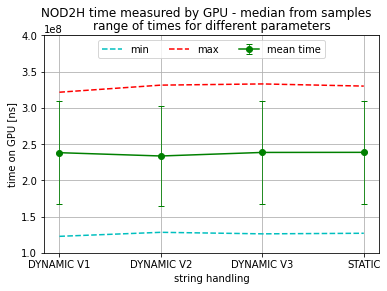

In [92]:
fig, ax = plt.subplots()
fig.suptitle('NOD2H time measured by GPU - median from samples')
ax.set_title('range of times for different parameters')
ax.errorbar(x=df_grid_str_res.index, y=df_grid_str_res['mean time'], yerr=df_grid_str_res['stddev'],
            linestyle='-', marker='o', elinewidth=0.8,capsize=3, color='g', label='mean time')
ax.plot(df_grid_str_res.index, df_grid_str_res['min time'], linestyle='--', color='c', label='min')
ax.plot(df_grid_str_res.index, df_grid_str_res['max time'], linestyle='--', color='r', label='max')
ax.set(xlabel='string handling',
       ylabel='time on GPU [ns]',ylim=(1e8,4e8))
ax.grid(visible=True)
ax.legend(loc='upper center',ncol=3)

plt.savefig('fig.png', transparent=False)
plt.show()

In [91]:
df = df_grid_ass = df_grid_grouped.median().groupby('assumptions')
df_grid_ass_res = pd.DataFrame(data={
    'mean time': df.mean()['NOD2H time measured by GPU [ns]'],
    'min time': df.min()['NOD2H time measured by GPU [ns]'],
    'max time': df.max()['NOD2H time measured by GPU [ns]'],
    'stddev':   df.std()['NOD2H time measured by GPU [ns]'],
})
df_grid_ass_res

,mean time,min time,max time,stddev
assumptions,,,,
constant order,2.445056e+08,122717041.0,332987549.0,7.891656e+07
none,2.298802e+08,141437133.5,280820679.0,5.442301e+07


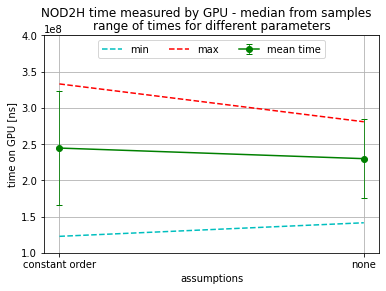

In [93]:
df = df_grid_ass_res

fig, ax = plt.subplots()
fig.suptitle('NOD2H time measured by GPU - median from samples')
ax.set_title('range of times for different parameters')
ax.errorbar(x=df.index, y=df['mean time'], yerr=df['stddev'],
            linestyle='-', marker='o', elinewidth=0.8,capsize=3, color='g', label='mean time')
ax.plot(df.index, df['min time'], linestyle='--', color='c', label='min')
ax.plot(df.index, df['max time'], linestyle='--', color='r', label='max')
ax.set(xlabel='assumptions',
       ylabel='time on GPU [ns]',ylim=(1e8,4e8))
ax.grid(visible=True)
ax.legend(loc='upper center',ncol=3)

plt.savefig('fig.png', transparent=False)
plt.show()